# Venture Funding with Deep Learning

In this notebook we work for a hypothetical company named Alphabet Soup. They want to develop a neural network model that will help determine whether or not a startup is likely to suceed. They provide us with data from their previous funding ventures

In [2]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

%matplotlib inline

---

## Prepare the data to be used on a neural network model

In [3]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv('Resources/applicants_data.csv')

# Review the DataFrame
applicant_data_df


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Review the data types associated with the columns
applicant_data_df.dtypes


EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns=['EIN','NAME'])

# Review the DataFrame
applicant_data_df


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes=='object'].index)

# Display the categorical variables list
categorical_variables


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)


In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, 
columns=enc.get_feature_names(categorical_variables)
)

# Review the DataFrame
encoded_df


c:\Users\gtkhh\anaconda3\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([applicant_data_df.drop(columns=categorical_variables), encoded_df],axis=1)

# Review the Dataframe
encoded_df


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
y


0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [12]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns='IS_SUCCESSFUL')

# Review the features DataFrame
X


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaled = scaler.fit_transform(X)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

In [15]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.columns)

# Review the number of features
number_input_features


116

In [16]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [17]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


58

In [18]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) //2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


29

In [19]:
# Create the Sequential model instance
nn = Sequential()


In [20]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))


In [21]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation='relu'))


In [22]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=1,  activation='sigmoid'))


In [23]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the Sequential model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')


In [25]:
# Fit the model using 50 epochs and the training data
model_01 = nn.fit(X_scaled, y, validation_split=0.3, epochs=50)


Epoch 1/50
751/751 [==============================] - 1s 1ms/step - loss: 0.5698 - accuracy: 0.7295 - val_loss: 0.6097 - val_accuracy: 0.6917
Epoch 2/50
751/751 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 0.7430 - val_loss: 0.5994 - val_accuracy: 0.6941
Epoch 3/50
751/751 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7460 - val_loss: 0.6041 - val_accuracy: 0.6948
Epoch 4/50
751/751 [==============================] - 1s 945us/step - loss: 0.5334 - accuracy: 0.7465 - val_loss: 0.6013 - val_accuracy: 0.6932
Epoch 5/50
751/751 [==============================] - 1s 969us/step - loss: 0.5322 - accuracy: 0.7463 - val_loss: 0.6011 - val_accuracy: 0.6865
Epoch 6/50
751/751 [==============================] - 1s 975us/step - loss: 0.5319 - accuracy: 0.7456 - val_loss: 0.6024 - val_accuracy: 0.6851
Epoch 7/50
751/751 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7468 - val_loss: 0.5967 - val_accuracy: 0.6901


### Evaluate the Model


In [26]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1072/1072 [==============================] - 1s 616us/step - loss: 0.5449 - accuracy: 0.7356
Loss: 0.544928252696991, Accuracy: 0.7355607748031616


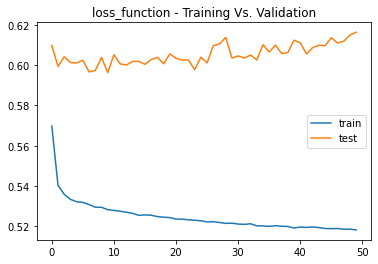

In [27]:
# Train vs test for loss
plt.plot(model_01.history["loss"])
plt.plot(model_01.history["val_loss"])
plt.title("loss_function - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

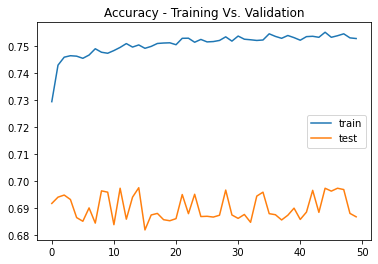

In [28]:
# Train vs test for accuracy
plt.plot(model_01.history["accuracy"])
plt.plot(model_01.history["val_accuracy"])
plt.title("Accuracy - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

### Save and export model to an HDF5 file. 


In [29]:
# Set the model's file path
file_path = Path('Resources/AlphabetSoup.h5')

# Export your model to a HDF5 file
nn.save(file_path)


---

## Optimize the neural network model


### Alternative Model 1

Significantly increasing number of epochs

In [33]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.columns)

# Review the number of features
number_input_features

116

In [34]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1


In [35]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

58

In [36]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 = (hidden_nodes_layer1_A1 + 1) // 2

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A1

29

In [37]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [38]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation='relu'))

# Second hidden layer

nn_A1.add(Dense(units=hidden_nodes_layer2_A1, activation='relu'))

# Output layer
nn_A1.add(Dense(units=1,  activation='sigmoid'))


# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dense_4 (Dense)             (None, 29)                1711      
                                                                 
 dense_5 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the Sequential model
nn_A1.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')


In [40]:
# Fit the model using 500 epochs and the training data
model_A1 =  nn_A1.fit(X_scaled, y, validation_split=0.3, epochs=500)

Epoch 1/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5620 - accuracy: 0.7317 - val_loss: 0.6037 - val_accuracy: 0.6959
Epoch 2/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5404 - accuracy: 0.7424 - val_loss: 0.6017 - val_accuracy: 0.6835
Epoch 3/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7443 - val_loss: 0.6044 - val_accuracy: 0.6820
Epoch 4/500
751/751 [==============================] - 1s 981us/step - loss: 0.5344 - accuracy: 0.7450 - val_loss: 0.5999 - val_accuracy: 0.6864
Epoch 5/500
751/751 [==============================] - 1s 993us/step - loss: 0.5323 - accuracy: 0.7443 - val_loss: 0.6045 - val_accuracy: 0.6970
Epoch 6/500
751/751 [==============================] - 1s 960us/step - loss: 0.5322 - accuracy: 0.7464 - val_loss: 0.6002 - val_accuracy: 0.6970
Epoch 7/500
751/751 [==============================] - 1s 960us/step - loss: 0.5308 - accuracy: 0.7469 - val_loss: 0.6024 - val_accuracy

#### Evaluate the model 

In [41]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}" )

1072/1072 [==============================] - 1s 711us/step - loss: 0.5563 - accuracy: 0.7376
Loss: 0.5563056468963623, Accuracy: 0.7375725507736206


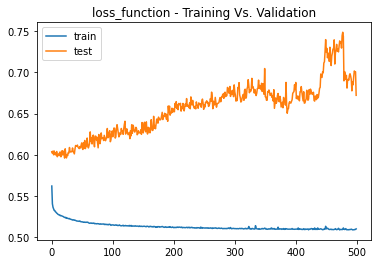

In [42]:
# Train vs test for loss
plt.plot(model_A1.history["loss"])
plt.plot(model_A1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

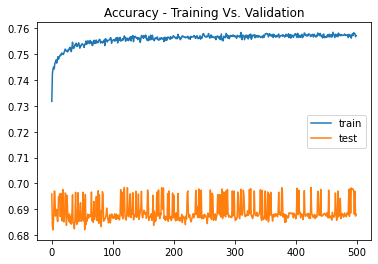

In [43]:
# Train vs test for accuracy
plt.plot(model_A1.history["accuracy"])
plt.plot(model_A1.history["val_accuracy"])
plt.title("Accuracy - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

Results: Model loss worsened, no change in accuracy

#### Alternative Model 2

Increasing layer neuron number

In [44]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.columns)

# Review the number of features
number_input_features

116

In [45]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [46]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 128

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A2

128

In [47]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = 64

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A2

64

In [48]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [49]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation='relu'))

# Second hidden layer

nn_A2.add(Dense(units=hidden_nodes_layer2_A2, activation='relu'))

# Output layer
nn_A2.add(Dense(units=1,  activation='sigmoid'))


# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               14976     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23,297
Trainable params: 23,297
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn_A2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [51]:
# Fit the model
model_A2 =  nn_A2.fit(X_scaled, y, validation_split=0.3, epochs=500)


Epoch 1/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7349 - val_loss: 0.6016 - val_accuracy: 0.6957
Epoch 2/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7421 - val_loss: 0.6031 - val_accuracy: 0.6956
Epoch 3/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7435 - val_loss: 0.5997 - val_accuracy: 0.6888
Epoch 4/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7456 - val_loss: 0.6037 - val_accuracy: 0.6955
Epoch 5/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7471 - val_loss: 0.5961 - val_accuracy: 0.6942
Epoch 6/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7476 - val_loss: 0.6061 - val_accuracy: 0.6959
Epoch 7/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7477 - val_loss: 0.5970 - val_accuracy: 0.6987

#### Evaluate the model 

In [52]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}" )

1072/1072 [==============================] - 1s 685us/step - loss: 0.7187 - accuracy: 0.7400
Loss: 0.7187225818634033, Accuracy: 0.7399924397468567


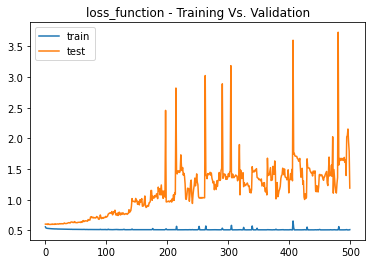

In [53]:
# Train vs test for loss
plt.plot(model_A2.history["loss"])
plt.plot(model_A2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

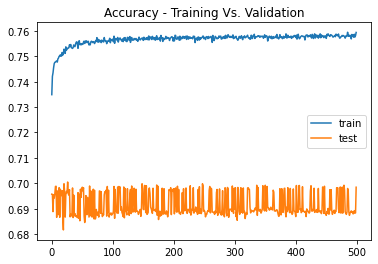

In [54]:
# Train vs test for accuracy
plt.plot(model_A2.history["accuracy"])
plt.plot(model_A2.history["val_accuracy"])
plt.title("Accuracy - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

Model loss again worsened, accuracy also reduced

#### Alternative Model 3

Increasing # of layers

In [55]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.columns)

# Review the number of features
number_input_features

116

In [56]:
# Define the number of neurons in the output layer
number_output_neurons_A3 = 1

In [57]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 = 128

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A3

128

In [59]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 = 64

# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A3

64

In [60]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A3 = 32

# Review the number of hidden nodes in the third layer
hidden_nodes_layer3_A3

32

In [61]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A3 = 16

# Review the number of hidden nodes in the fourth layer
hidden_nodes_layer4_A3

16

In [62]:
# Create the Sequential model instance
nn_A3 = Sequential()

In [63]:
# First hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim=number_input_features, activation='relu'))

# Second hidden layer

nn_A3.add(Dense(units=hidden_nodes_layer2_A3, activation='relu'))

# Third hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer3_A3, activation='relu'))

#  Fourth hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer4_A3, activation='relu'))

# Output layer
nn_A3.add(Dense(units=1,  activation='sigmoid'))


# Check the structure of the model
nn_A3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               14976     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 25,857
Trainable params: 25,857
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile the model
nn_A3.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [65]:
# Fit the model
model_A3 =  nn_A3.fit(X_scaled, y, validation_split=0.3, epochs=500)

Epoch 1/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.7326 - val_loss: 0.5961 - val_accuracy: 0.6929
Epoch 2/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7438 - val_loss: 0.5977 - val_accuracy: 0.6962
Epoch 3/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7466 - val_loss: 0.5962 - val_accuracy: 0.6898
Epoch 4/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7466 - val_loss: 0.6021 - val_accuracy: 0.6981
Epoch 5/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7481 - val_loss: 0.6003 - val_accuracy: 0.6900
Epoch 6/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7491 - val_loss: 0.5993 - val_accuracy: 0.6977
Epoch 7/500
751/751 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7493 - val_loss: 0.5985 - val_accuracy: 0.6963

#### Evaluate the model 

In [66]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}" )

1072/1072 [==============================] - 1s 687us/step - loss: 0.5957 - accuracy: 0.7377
Loss: 0.5956949591636658, Accuracy: 0.7377474308013916


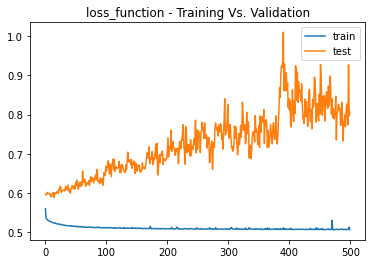

In [77]:
# Train vs test for loss
plt.plot(model_A3.history["loss"])
plt.plot(model_A3.history["val_loss"])
plt.title("loss_function - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

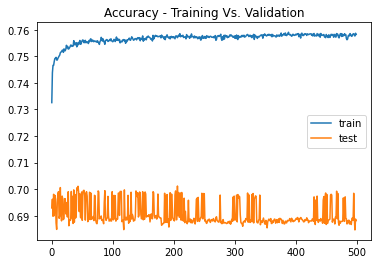

In [78]:
# Train vs test for accuracy
plt.plot(model_A3.history["accuracy"])
plt.plot(model_A3.history["val_accuracy"])
plt.title("Accuracy - Training Vs. Validation")
plt.legend(["train", "test"])
plt.show()

No significant improvement from previous models

### Compare models

In [69]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
1072/1072 [==============================] - 1s 600us/step - loss: 0.5449 - accuracy: 0.7356
Loss: 0.544928252696991, Accuracy: 0.7355607748031616


In [70]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy =nn_A1.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
1072/1072 [==============================] - 1s 617us/step - loss: 0.5563 - accuracy: 0.7376
Loss: 0.5563056468963623, Accuracy: 0.7375725507736206


In [71]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
1072/1072 [==============================] - 1s 651us/step - loss: 0.7187 - accuracy: 0.7400
Loss: 0.7187225818634033, Accuracy: 0.7399924397468567


In [72]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_scaled, y)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 3 Results
1072/1072 [==============================] - 1s 646us/step - loss: 0.5957 - accuracy: 0.7377
Loss: 0.5956949591636658, Accuracy: 0.7377474308013916


### Save alternative models as an HDF5 file.


In [73]:
# Set the file path for the first alternative model
file_path = Path('Resources/AlphabetSoup_A1.h5')

# Export your model to a HDF5 file
nn_A1.save(file_path)


In [75]:
# Set the file path for the second alternative model
file_path = Path('Resources/AlphabetSoup_A2.h5')

# Export your model to a HDF5 file
nn_A2.save(file_path)


In [76]:
# Set the model's file path
file_path = Path('Resources/AlphabetSoup_A3.h5')

# Export your model to a HDF5 file
nn_A3.save(file_path)